# Imports

In [347]:
import pandas as pd
import numpy as np
from requests import get
from os import path
from bs4 import BeautifulSoup
import acquire as ac
import prepare
import re
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy import stats
import json

import warnings
warnings.filterwarnings("ignore")

# Acquire

In [71]:
url = 'https://github.com/search?o=desc&p={num}&q=OpenCV&s=stars&type=Repositories'
response = get(url)

In [3]:
urls = ac.get_range_urls(1, 6)
len(urls)

50

In [14]:
urls2 = ac.get_range_urls(6, 11)
len(urls2)

50

In [40]:
urls3 = ac.get_range_urls(11, 16)
len(urls3)

50

In [35]:
urls4 = ac.get_range_urls(16, 21)
len(urls4)

50

In [79]:
urls5 = ac.get_range_urls(21, 26)
len(urls5)

50

In [80]:
all_urls = urls + urls2 + urls3 + urls4 + urls5
len(all_urls)

250

In [91]:
repos = ac.scrape_github_data(all_urls)

In [92]:
json.dump(repos, open("data.json", "w"), indent=1)

In [259]:
repos = pd.read_json('data.json')

In [260]:
repos.head()

,repo,language,readme_contents
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...


In [261]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


# Prepare

In [262]:
# Creating a cleaned text column
repos['text_cleaned'] = repos.readme_contents.apply(prepare.basic_clean)
# Creating a tokenized text column
repos['text_tokenized'] = repos.text_cleaned.apply(prepare.tokenize)
# Creating a lemmatized text column
repos['text_lemmatized'] = repos.text_tokenized.apply(prepare.lemmatize)
# Creating a filtered text column
repos['text_filtered'] = repos.text_lemmatized.apply(prepare.remove_stopwords)
repos.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...


In [263]:
words = [re.sub(r'([^a-z0-9\s]|\s.\s)', '', doc).split() for doc in repos.text_filtered]

repos = pd.concat([repos, pd.DataFrame({'words': words})], axis=1)

repos.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor..."
2,oarriaga/face_classification,Python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz..."


In [264]:
repos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             250 non-null    object
 1   language         243 non-null    object
 2   readme_contents  250 non-null    object
 3   text_cleaned     250 non-null    object
 4   text_tokenized   250 non-null    object
 5   text_lemmatized  250 non-null    object
 6   text_filtered    250 non-null    object
 7   words            250 non-null    object
dtypes: object(8)
memory usage: 15.8+ KB


In [265]:
# We need to look at which repos have nulls for language
repos[repos.language.isnull()]

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
27,amusi/AI-Job-Notes,None,# AI-Job-Notes\nAI算法岗求职攻略：涵盖校招时间表、准备攻略、刷题指南、内推...,aijobnotes\naiai\n\naislam\n\n issues\n\n \n...,aijobnotes\naiai\n\naislam\n\n issues\n\n \n\n...,aijobnotes aiai aislam issue markdowntoc depth...,aijobnotes aiai aislam issue markdowntoc depth...,"[aijobnotes, aiai, aislam, issue, markdowntoc,..."
35,nagadomi/lbpcascade_animeface,None,# lbpcascade_animeface\n\nThe face detector fo...,lbpcascade_animeface\n\nthe face detector for...,lbpcascade_animeface\n\nthe face detector for ...,lbpcascade_animeface the face detector for ani...,lbpcascade_animeface face detector animemanga ...,"[lbpcascadeanimeface, face, detector, animeman..."
39,changwookjun/StudyBook,None,# Study E-Book(ComputerVision DeepLearning Mac...,study ebookcomputervision deeplearning machin...,study ebookcomputervision deeplearning machine...,study ebookcomputervision deeplearning machine...,study ebookcomputervision deeplearning machine...,"[study, ebookcomputervision, deeplearning, mac..."
66,xiangjiana/Android-MS,None,[**版权声明**](#版权声明)\n\n# Android 高级面试\n\n### ![面...,\n\n android \n\n img2020androidpng\n \n andr...,android \n\n img2020androidpng\n \n androidhtt...,android img2020androidpng androidhttpswwwjians...,android img2020androidpng androidhttpswwwjians...,"[android, img2020androidpng, androidhttpswwwji..."
70,opencv/opencv_extra,None,### OpenCV: Open Source Computer Vision Librar...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library thi...,opencv open source computer vision library rep...,"[opencv, open, source, computer, vision, libra..."
142,huihut/OpenCV-MinGW-Build,None,# OpenCV-MinGW-Build\n\nMinGW 32bit and 64bit ...,opencvmingwbuild\n\nmingw 32bit and 64bit ver...,opencvmingwbuild\n\nmingw 32bit and 64bit vers...,opencvmingwbuild mingw 32bit and 64bit version...,opencvmingwbuild mingw 32bit 64bit version ope...,"[opencvmingwbuild, mingw, 32bit, 64bit, versio..."
166,opencv/opencv_3rdparty,None,### OpenCV: Open Source Computer Vision Librar...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library thi...,opencv open source computer vision library rep...,"[opencv, open, source, computer, vision, libra..."


In [266]:
# There are only 6 of the 150 so we will just drop them
repos = repos[repos.language.notnull()]
repos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 243 entries, 0 to 249
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             243 non-null    object
 1   language         243 non-null    object
 2   readme_contents  243 non-null    object
 3   text_cleaned     243 non-null    object
 4   text_tokenized   243 non-null    object
 5   text_lemmatized  243 non-null    object
 6   text_filtered    243 non-null    object
 7   words            243 non-null    object
dtypes: object(8)
memory usage: 17.1+ KB


In [267]:
# Lets see the breakdown of languages for OpenCV repos
repos.language.value_counts()

Python              101
C++                  79
Java                 16
Jupyter Notebook     10
JavaScript            7
C#                    5
Objective-C           3
Shell                 3
Go                    3
C                     2
PHP                   2
HTML                  2
Makefile              1
CMake                 1
Scala                 1
Matlab                1
Dockerfile            1
Pascal                1
Objective-C++         1
Perl                  1
Assembly              1
Rust                  1
Name: language, dtype: int64

In [268]:
main_two = repos[(repos.language == 'Python') | (repos.language == 'C++')].copy()
main_two.language.value_counts()

Python    101
C++        79
Name: language, dtype: int64

In [270]:
main_two.loc[main_two.language == 'Python', 'language'] = 'python'

In [271]:
main_two.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe..."
1,opencv/opencv_contrib,C++,## Repository for OpenCV's extra modules\n\nTh...,repository for opencvs extra modules\n\nthis ...,repository for opencvs extra modules\n\nthis r...,repository for opencvs extra module this repos...,repository opencvs extra module repository int...,"[repository, opencvs, extra, module, repositor..."
2,oarriaga/face_classification,python,# This repository is deprecated for at TF-2.0 ...,this repository is deprecated for at tf20 rew...,this repository is deprecated for at tf20 rewr...,this repository is deprecated for at tf20 rewr...,repository deprecated tf20 rewrite visit https...,"[repository, deprecated, tf20, rewrite, visit,..."
3,opencv/opencv,C++,## OpenCV: Open Source Computer Vision Library...,opencv open source computer vision library\n\...,opencv open source computer vision library\n\n...,opencv open source computer vision library res...,opencv open source computer vision library res...,"[opencv, open, source, computer, vision, libra..."
4,Ewenwan/MVision,C++,# MVision Machine Vision 机器视觉\n[AI算法工程师手册 数学基础...,mvision machine vision \nai httpwwwhuaxia...,mvision machine vision \nai httpwwwhuaxiaozhua...,mvision machine vision ai httpwwwhuaxiaozhuanc...,mvision machine vision ai httpwwwhuaxiaozhuanc...,"[mvision, machine, vision, ai, httpwwwhuaxiaoz..."


In [272]:
train_validate, test = train_test_split(main_two.copy(), test_size=.2)
train, validate = train_test_split(train_validate.copy(), test_size=.25)

In [273]:
print(train.shape, validate.shape, test.shape)

(108, 8) (36, 8) (36, 8)


In [274]:
print(train.language.value_counts(), '\n')
print(validate.language.value_counts(), '\n')
print(test.language.value_counts())

python    58
C++       50
Name: language, dtype: int64 

python    22
C++       14
Name: language, dtype: int64 

python    21
C++       15
Name: language, dtype: int64


# Explore

### What are the most common words in READMEs?

In [277]:
# Now we will create word lists for python and C++ repos as they are the majority of our data, and one for all words
python_words = ' '.join(train[train.language=='python'].text_filtered)
c_plus_plus_words = ' '.join(train[train.language=='C++'].text_filtered)
all_words = ' '.join(train.text_filtered)

python_words = re.sub(r'\s.\s', '', python_words)
c_plus_plus_words = re.sub(r'\s.\s', '', c_plus_plus_words)
all_words = re.sub(r'\s.\s', '', all_words)

In [278]:
python_freq = pd.Series(python_words.split()).value_counts()
c_plus_plus_freq = pd.Series(c_plus_plus_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

print('Most common python words:')
print(python_freq.head())
print()
print('Most common c++ words:')
print(c_plus_plus_freq.head())
print()
print('Most common words in all repos:')
print(all_freq.head())

Most common python words:
image     612
python    230
model     220
video     197
face      193
dtype: int64

Most common c++ words:
&#9;      534
opencv    243
build     220
image     140
use       123
dtype: int64

Most common words in all repos:
image     752
&#9;      594
opencv    388
using     274
python    252
dtype: int64


In [307]:
word_counts = (pd.concat([all_freq, python_freq, c_plus_plus_freq], axis=1, sort=True)
               .set_axis(['all', 'python', 'C++'], axis=1, inplace=False)
               .fillna(0)
               .apply(lambda s: s.astype(int))
              )

word_counts.sort_values(by='all', ascending=False).head(10)

,all,python,C++
image,752,612,140
&#9;,594,60,534
opencv,388,145,243
using,274,154,120
python,252,230,22
build,250,30,220
face,249,193,56
file,247,152,95
model,241,220,21
video,237,197,40


### Does the length of the README vary by programming language?

In [282]:
train['doc_len'] = [len(x) for x in train.words]
validate['doc_len'] = [len(x) for x in validate.words]
test['doc_len'] = [len(x) for x in test.words]

In [283]:
train.head()

,repo,language,readme_contents,text_cleaned,text_tokenized,text_lemmatized,text_filtered,words,doc_len
87,bytefish/opencv,C++,# bytefish/opencv #\n\nThis repository contain...,bytefishopencv \n\nthis repository contains o...,bytefishopencv \n\nthis repository contains op...,bytefishopencv this repository contains opencv...,bytefishopencv repository contains opencv code...,"[bytefishopencv, repository, contains, opencv,...",124
0,openframeworks/openFrameworks,C++,[openFrameworks](http://openframeworks.cc/)\n=...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc\n\n\nopenfr...,openframeworkshttpopenframeworkscc openframewo...,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...",512
108,takmin/OpenCV-Marker-less-AR,C++,2012/01/10\nMarker less AR is using natural im...,20120110\nmarker less ar is using natural imag...,20120110\nmarker less ar is using natural imag...,20120110 marker le ar is using natural image a...,20120110 marker le ar using natural image mark...,"[20120110, marker, le, ar, using, natural, ima...",138
208,ZQPei/Sorting_Visualization,python,![](img/sort.jpg)\n\n# Sorting Visualization a...,imgsortjpg\n\n sorting visualization and audib...,imgsortjpg\n\n sorting visualization and audib...,imgsortjpg sorting visualization and audibiliz...,imgsortjpg sorting visualization audibilizatio...,"[imgsortjpg, sorting, visualization, audibiliz...",204
30,abhiTronix/vidgear,python,<!--\r\n======================================...,\r\n\r\nvidgear library sourcecode is deployed...,vidgear library sourcecode is deployed under t...,vidgear library sourcecode is deployed under t...,vidgear library sourcecode deployed apache 20 ...,"[vidgear, library, sourcecode, deployed, apach...",2118


In [284]:
train.groupby(train.language).doc_len.describe()

,count,mean,std,min,25%,50%,75%,max
language,,,,,,,,
C++,50.0,366.460000,354.003356,11.0,168.75,279.0,494.75,1980.0
python,58.0,538.896552,717.213753,5.0,104.50,269.0,676.75,3157.0


### What does the distribution of IDFs look like for the most common words?

In [285]:
def idf(word):
    n_occurences = sum([1 for doc in train.text_filtered if word in doc])
    return np.log(len(train.words) / n_occurences)

In [286]:
unique_words = pd.Series(' '.join(train.text_filtered).split()).unique()

In [287]:
unique_words

array(['bytefishopencv', 'repository', 'contains', ..., 'child', 'dat',
       'tranhttpwwwdattrancom'], dtype=object)

In [288]:
idf_words = (pd.DataFrame(dict(word=unique_words))
 .assign(idf=lambda df: df.word.apply(idf))
 .set_index('word')
 .sort_values(by='idf', ascending=False))
idf_words.head(10)

,idf
word,
bytefishopencv,4.682131
thinking,4.682131
cvreadimagefilename,4.682131
cvreadimagebuffer,4.682131
imagedatastream,4.682131
cvimagedatastream,4.682131
sonload,4.682131
functionmatrix,4.682131
fscreatereadstreamexamplesfilesmonapngpipes,4.682131


In [289]:
idf_words.describe()

,idf
count,12038.000000
mean,4.096967
std,1.040849
min,0.000000
25%,3.988984
50%,4.682131
75%,4.682131
max,4.682131


In [290]:
top_five_words = pd.DataFrame()
for word in all_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_words = top_five_words.append(hold)

In [291]:
top_five_words.sort_values(by='idf', ascending=False)

,idf
word,
&#9;,1.637609
python,0.554997
using,0.405465
image,0.275412
opencv,0.087011


In [292]:
top_five_python = pd.DataFrame()
for word in python_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_python = top_five_python.append(hold)

In [293]:
top_five_python.sort_values(by='idf').sort_values(by='idf', ascending=False).head()

,idf
word,
model,0.968559
video,0.730888
face,0.730888
python,0.554997
image,0.275412


In [294]:
top_five_cplus2 = pd.DataFrame()
for word in c_plus_plus_freq.head().index:
    hold = idf_words[idf_words.index == word]
    top_five_cplus2 = top_five_cplus2.append(hold)

In [295]:
top_five_cplus2.sort_values(by='idf', ascending=False).head()

,idf
word,
&#9;,1.637609
build,0.656780
use,0.287682
image,0.275412
opencv,0.087011


### Comparing Doc Length

In [296]:
train.doc_len.describe()

count     108.000000
mean      459.064815
std       582.129274
min         5.000000
25%       134.250000
50%       270.500000
75%       545.750000
max      3157.000000
Name: doc_len, dtype: float64

In [298]:
train[train.language == 'python'].doc_len.describe()

count      58.000000
mean      538.896552
std       717.213753
min         5.000000
25%       104.500000
50%       269.000000
75%       676.750000
max      3157.000000
Name: doc_len, dtype: float64

In [299]:
train[train.language == 'C++'].doc_len.describe()

count      50.000000
mean      366.460000
std       354.003356
min        11.000000
25%       168.750000
50%       279.000000
75%       494.750000
max      1980.000000
Name: doc_len, dtype: float64

### Comparing Top Ten Words From Each Language

In [300]:
top_ten_python = word_counts['python'].sort_values(ascending=False).head(10)

top_ten_cplus2 = word_counts['C++'].sort_values(ascending=False).head(10)

top_ten_both = list(top_ten_python.index) + list(top_ten_cplus2.index)

top_ten_combined = word_counts[word_counts.index.isin(top_ten_both)]

In [301]:
top_ten_combined

,all,python,C++
&#9;,594,60,534
build,250,30,220
const,86,0,86
example,164,77,87
face,249,193,56
file,247,152,95
image,752,612,140
img,178,147,31
model,241,220,21
object,173,147,26


In [308]:
word_counts['pct_python'] = word_counts['python'] / word_counts['all']
word_counts['pct_cplus2'] = word_counts['C++'] / word_counts['all']

In [309]:
# There are words in word counts with 0 for values
word_counts = word_counts[word_counts['all'] != 0]
word_counts['all'].sort_values()

httpeigentuxfamilyorg      1
uikit                      1
uic                        1
learninga                  1
learningba                 1
                        ... 
python                   252
using                    274
opencv                   388
&#9;                     594
image                    752
Name: all, Length: 12553, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text yticklabel objects>)

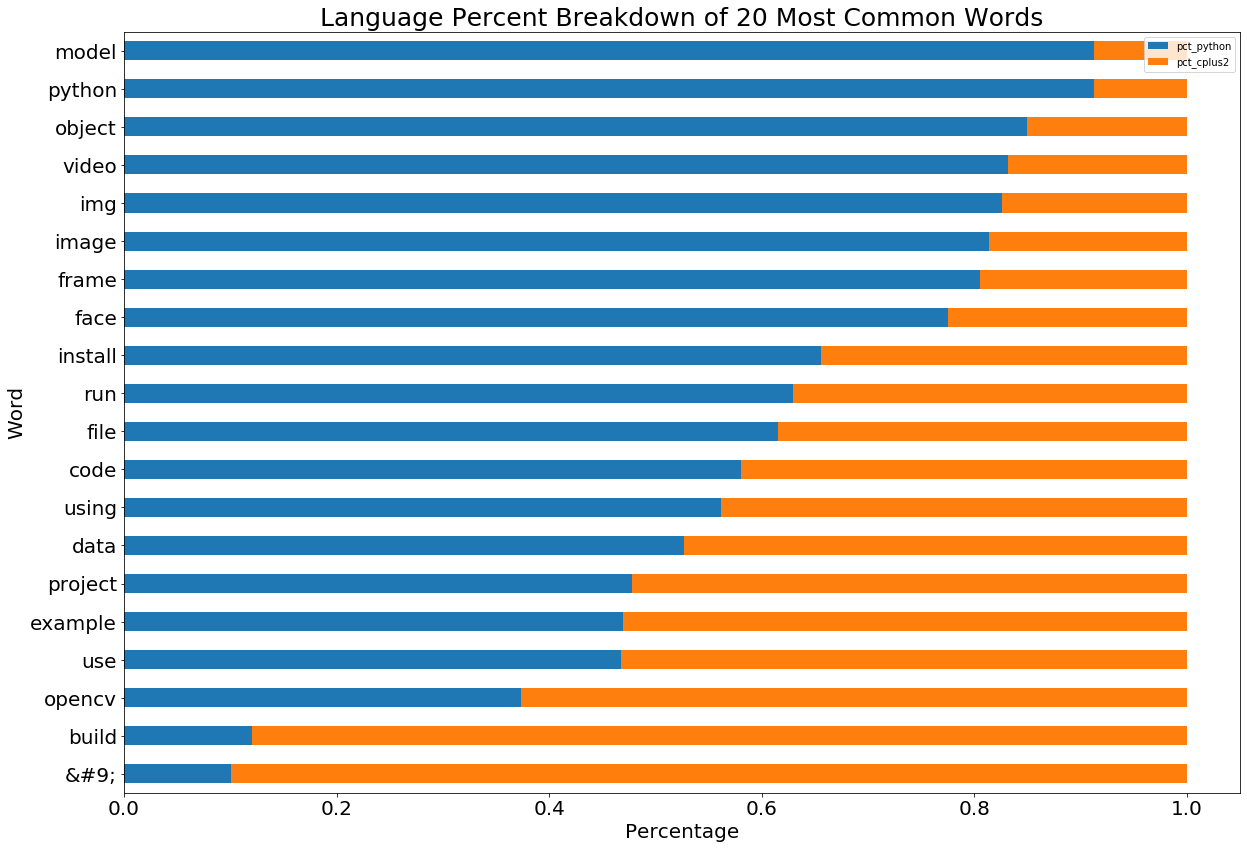

In [381]:
(word_counts.sort_values(by='all')[['pct_python', 'pct_cplus2']].tail(20).sort_values(by='pct_python')
 .plot.barh(stacked=True, figsize=(20,14)))
plt.title('Language Percent Breakdown of 20 Most Common Words', fontsize=25)
plt.xlabel('Percentage', fontsize=20)
plt.ylabel('Word', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

### Trimming Train
Now we will trim train down so that we can add features before pushing into modeling.

In [311]:
train = train.drop(columns=['readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'repo'])
train.head()

,language,text_filtered,words,doc_len
87,C++,bytefishopencv repository contains opencv code...,"[bytefishopencv, repository, contains, opencv,...",124
0,C++,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...",512
108,C++,20120110 marker le ar using natural image mark...,"[20120110, marker, le, ar, using, natural, ima...",138
208,python,imgsortjpg sorting visualization audibilizatio...,"[imgsortjpg, sorting, visualization, audibiliz...",204
30,python,vidgear library sourcecode deployed apache 20 ...,"[vidgear, library, sourcecode, deployed, apach...",2118


In [313]:
train['has_model'] = train.text_filtered.str.contains('model')

train['has_build'] = train.text_filtered.str.contains('build')

train['has_symbols'] = train.text_filtered.str.contains('&#9')

train['has_img'] = train.text_filtered.str.contains('img')

train['has_python'] = train.text_filtered.str.contains('python')
train.head()

,language,text_filtered,words,doc_len,has_model,has_build,has_symbols,has_img,has_python
87,C++,bytefishopencv repository contains opencv code...,"[bytefishopencv, repository, contains, opencv,...",124,False,False,False,False,False
0,C++,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...",512,False,True,False,False,False
108,C++,20120110 marker le ar using natural image mark...,"[20120110, marker, le, ar, using, natural, ima...",138,True,True,False,False,False
208,python,imgsortjpg sorting visualization audibilizatio...,"[imgsortjpg, sorting, visualization, audibiliz...",204,False,False,False,True,True
30,python,vidgear library sourcecode deployed apache 20 ...,"[vidgear, library, sourcecode, deployed, apach...",2118,False,True,False,True,True


In [314]:
larger_docs = train[train['doc_len'] >= 800]

train['has_larger_doc'] = train.index.isin(larger_docs.index)
train.head()

,language,text_filtered,words,doc_len,has_model,has_build,has_symbols,has_img,has_python,has_larger_doc
87,C++,bytefishopencv repository contains opencv code...,"[bytefishopencv, repository, contains, opencv,...",124,False,False,False,False,False,False
0,C++,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...",512,False,True,False,False,False,False
108,C++,20120110 marker le ar using natural image mark...,"[20120110, marker, le, ar, using, natural, ima...",138,True,True,False,False,False,False
208,python,imgsortjpg sorting visualization audibilizatio...,"[imgsortjpg, sorting, visualization, audibiliz...",204,False,False,False,True,True,False
30,python,vidgear library sourcecode deployed apache 20 ...,"[vidgear, library, sourcecode, deployed, apach...",2118,False,True,False,True,True,True


In [315]:
train.has_larger_doc.value_counts()

False    93
True     15
Name: has_larger_doc, dtype: int64

## Hypothesis Tests

### Hypothesis Test 1

$H_0$: The word model in a document and its programming language are independent  
$H_a$: The word model in a document and its programming language are dependent  
a = .05

In [383]:
# We will be doing a chi2 test for this hypothesis
observed = pd.crosstab(train.language, train.has_model)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_model values\nchi2: {chi2}\tp: {p}')

has_model values
chi2: 6.642983568281384	p: 0.00995470823356948


In [317]:
observed

has_model,False,True
language,,
C++,38,12
python,29,29


### Hypothesis Test 2

$H_0$: The word build in a document and its programming language are independent  
$H_a$: The word build in a document and its programming language are dependent  
a = .05

In [382]:
# We will be doing a chi2 test for this hypothesis
observed = pd.crosstab(train.language, train.has_build)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_build values\nchi2: {chi2}\tp: {p}')

has_build values
chi2: 8.55738347859037	p: 0.0034412365728902013


In [319]:
observed

has_build,False,True
language,,
C++,16,34
python,36,22


### Hypothesis Test 3

$H_0$: The length of a documents is independent of its programming language  
$H_a$: The longer a document is the more likely it is to be a python document  
a = .05

In [322]:
# We will be performing a two-tailed t-test for this hypothesis
x1 = train[train.language == 'python'].doc_len
x2 = train[train.language == 'C++'].doc_len

stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=1.5448737329022264, pvalue=0.12535716268114164)

### Hyposthesis Test 4

$H_0$: The symbols "&#9" appearing in that order is independent from the documents programming language  
$H_a$: The symbols "&#9" appearing in that order is dependent on the documents programming language  
a = .05

In [324]:
# We will be doing a chi2 test for this hypothesis test
observed = pd.crosstab(train.language, train.has_symbols)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_symbols values\nchi2: {chi2}\tp: {p}')

has_symbols values
chi2: 0.14382877526753896	p: 0.7045039748436044


### Hypothesis Test 5

$H_0$: The word python in a document and its programming language are independent  
$H_a$: The word python in a document and its programming language are dependent  
a = .05

In [386]:
# We will be doing a chi2 test for this hypothesis test
observed = pd.crosstab(train.language, train.has_python)

chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'has_python values\nchi2: {chi2}\tp: {p}')

has_python values
chi2: 56.168618271509395	p: 6.651475003686581e-14


In [341]:
observed

has_python,False,True
language,,
C++,41,9
python,5,53


Features worth keeping: has_python, has_build, has_model

In [332]:
train = train.drop(columns=['has_img', 'has_symbols', 'has_larger_doc'])

In [357]:
validate['has_model'] = validate.text_filtered.str.contains('model')
test['has_model'] = test.text_filtered.str.contains('model')

validate['has_build'] = validate.text_filtered.str.contains('build')
test['has_build'] = test.text_filtered.str.contains('build')

validate['has_python'] = validate.text_filtered.str.contains('python')
test['has_python'] = test.text_filtered.str.contains('python')

validate['has_model'] = np.where((validate.has_model == True), 1, 0)
validate['has_build'] = np.where((validate.has_build == True), 1, 0)
validate['has_python'] = np.where((validate.has_python == True), 1, 0)

test['has_model'] = np.where((test.has_model == True), 1, 0)
test['has_build'] = np.where((test.has_build == True), 1, 0)
test['has_python'] = np.where((test.has_python == True), 1, 0)

# Modeling

### Baseline

In [224]:
# We need to have a baseline to compare to
train.language.value_counts()

Python    57
C++       51
Name: language, dtype: int64

In [333]:
train['baseline'] = 'python'
train.head()

,language,text_filtered,words,doc_len,has_model,has_build,has_python,baseline
87,C++,bytefishopencv repository contains opencv code...,"[bytefishopencv, repository, contains, opencv,...",124,False,False,False,python
0,C++,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...",512,False,True,False,python
108,C++,20120110 marker le ar using natural image mark...,"[20120110, marker, le, ar, using, natural, ima...",138,True,True,False,python
208,python,imgsortjpg sorting visualization audibilizatio...,"[imgsortjpg, sorting, visualization, audibiliz...",204,False,False,True,python
30,python,vidgear library sourcecode deployed apache 20 ...,"[vidgear, library, sourcecode, deployed, apach...",2118,False,True,True,python


In [331]:
print(classification_report(train.language, train.baseline))

              precision    recall  f1-score   support

         C++       0.00      0.00      0.00        50
      python       0.54      1.00      0.70        58

    accuracy                           0.54       108
   macro avg       0.27      0.50      0.35       108
weighted avg       0.29      0.54      0.38       108



## Train Models

In [334]:
train['has_model'] = np.where((train.has_model == True), 1, 0)
train['has_build'] = np.where((train.has_build == True), 1, 0)
train['has_python'] = np.where((train.has_python == True), 1, 0)
train.head()

,language,text_filtered,words,doc_len,has_model,has_build,has_python,baseline
87,C++,bytefishopencv repository contains opencv code...,"[bytefishopencv, repository, contains, opencv,...",124,0,0,0,python
0,C++,openframeworkshttpopenframeworkscc openframewo...,"[openframeworkshttpopenframeworkscc, openframe...",512,0,1,0,python
108,C++,20120110 marker le ar using natural image mark...,"[20120110, marker, le, ar, using, natural, ima...",138,1,1,0,python
208,python,imgsortjpg sorting visualization audibilizatio...,"[imgsortjpg, sorting, visualization, audibiliz...",204,0,0,1,python
30,python,vidgear library sourcecode deployed apache 20 ...,"[vidgear, library, sourcecode, deployed, apach...",2118,0,1,1,python


### has_model Model

In [335]:
y_train = train.language
x_train_model = train[['has_model']]

In [336]:
lr_model = LogisticRegression(random_state=123)

lr_model.fit(x_train_model, y_train)

train['model_prediction'] = lr_model.predict(x_train_model)

print(classification_report(train.language, train.model_prediction))

              precision    recall  f1-score   support

         C++       0.57      0.76      0.65        50
      python       0.71      0.50      0.59        58

    accuracy                           0.62       108
   macro avg       0.64      0.63      0.62       108
weighted avg       0.64      0.62      0.62       108



### has_build Model

In [338]:
x_train_build = train[['has_build']]

lr_build = LogisticRegression(random_state=123)

lr_build.fit(x_train_build, y_train)

train['build_prediction'] = lr_build.predict(x_train_build)

print(classification_report(train.language, train.build_prediction))

              precision    recall  f1-score   support

         C++       0.61      0.68      0.64        50
      python       0.69      0.62      0.65        58

    accuracy                           0.65       108
   macro avg       0.65      0.65      0.65       108
weighted avg       0.65      0.65      0.65       108



### has_python Model

In [344]:
x_train_python = train[['has_python']]

lr_python = LogisticRegression(random_state=123)

lr_python.fit(x_train_python, y_train)

train['python_prediction'] = lr_build.predict(x_train_python)

print(classification_report(train.language, train.python_prediction))

              precision    recall  f1-score   support

         C++       0.15      0.18      0.16        50
      python       0.11      0.09      0.10        58

    accuracy                           0.13       108
   macro avg       0.13      0.13      0.13       108
weighted avg       0.13      0.13      0.13       108



### Bag of Words Model

In [349]:
vectorizer = CountVectorizer(stop_words='english', 
                             min_df=20, 
                             ngram_range=(1,2), 
                             binary=True)

vectorizer.fit(train.text_filtered)

vectorizer.get_feature_names()

x_bow = vectorizer.transform(train.text_filtered)

lr_bag = LogisticRegression(random_state=123)

lr_bag = lr_bag.fit(x_bow, y_train)

train['bag_prediction'] = lr_bag.predict(x_bow)

print(classification_report(train.language, train.bag_prediction))

              precision    recall  f1-score   support

         C++       1.00      1.00      1.00        50
      python       1.00      1.00      1.00        58

    accuracy                           1.00       108
   macro avg       1.00      1.00      1.00       108
weighted avg       1.00      1.00      1.00       108



### TF-IDF Model

In [366]:
tfidf = TfidfVectorizer(stop_words='english', min_df = 20,
                             ngram_range=(1,2), 
                             binary=True)

tfidf_matrix = tfidf.fit_transform(train.text_filtered)

tfidf.vocabulary_

vector_spaces = tfidf.transform(train.text_filtered)

x_tf = tfidf_matrix

lr_tf = LogisticRegression(random_state=123)

lr_tf = lr_tf.fit(x_tf, y_train)

train['tfidf_prediction'] = lr_tf.predict(x_tf)

print(classification_report(train.language, train.tfidf_prediction))

              precision    recall  f1-score   support

         C++       1.00      0.92      0.96        50
      python       0.94      1.00      0.97        58

    accuracy                           0.96       108
   macro avg       0.97      0.96      0.96       108
weighted avg       0.97      0.96      0.96       108



### Combined Terms Model

In [352]:
x_train_combo = train[['has_model', 'has_build', 'has_python']]

lr_combo = LogisticRegression(random_state=123)

lr_combo.fit(x_train_combo, y_train)

train['combo_prediction'] = lr_combo.predict(x_train_combo)

print(classification_report(train.language, train.combo_prediction))

              precision    recall  f1-score   support

         C++       0.89      0.82      0.85        50
      python       0.85      0.91      0.88        58

    accuracy                           0.87       108
   macro avg       0.87      0.87      0.87       108
weighted avg       0.87      0.87      0.87       108



Three best models are TF-IDF model, Bag of Words Model, and Combined Terms Model.

## Validation Models

In [354]:
validate = validate.drop(columns=['repo', 'readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'words', 'doc_len'])
validate.head()

,language,text_filtered
135,C++,opencv 40 cpython sdk tutorial include dnn mod...
63,python,neural compute application zoo ncappzoo stable...
215,C++,dynamicfusion implementation newcombe et al 20...
169,python,buildshttpsgithubcomdanforthcenterplantcvworkf...
187,C++,footfall introduction footfall camera based pe...


### Bag of Words Model

In [363]:
v_bow = vectorizer.transform(validate.text_filtered)

validate['bag_prediction'] = lr_bag.predict(v_bow)

print(classification_report(validate.language, validate.bag_prediction))

              precision    recall  f1-score   support

         C++       0.62      0.57      0.59        14
      python       0.74      0.77      0.76        22

    accuracy                           0.69        36
   macro avg       0.68      0.67      0.67        36
weighted avg       0.69      0.69      0.69        36



### TF-IDF Model

In [368]:
tfidf_matrix = tfidf.transform(validate.text_filtered)

vector_spaces = tfidf.transform(validate.text_filtered)

x_tf = tfidf_matrix

validate['tfidf_prediction'] = lr_tf.predict(x_tf)

print(classification_report(validate.language, validate.tfidf_prediction))

              precision    recall  f1-score   support

         C++       0.62      0.57      0.59        14
      python       0.74      0.77      0.76        22

    accuracy                           0.69        36
   macro avg       0.68      0.67      0.67        36
weighted avg       0.69      0.69      0.69        36



### Combined Terms Model

In [369]:
x_validate_combo = validate[['has_model', 'has_build', 'has_python']]
y_validate = validate.language

lr_combo.fit(x_validate_combo, y_validate)

validate['combo_prediction'] = lr_combo.predict(x_validate_combo)

print(classification_report(validate.language, validate.combo_prediction))

              precision    recall  f1-score   support

         C++       0.73      0.57      0.64        14
      python       0.76      0.86      0.81        22

    accuracy                           0.75        36
   macro avg       0.74      0.72      0.72        36
weighted avg       0.75      0.75      0.74        36



Our best model is the Combined Terms model, we will be taking this one in to test.

## Test Model

In [370]:
x_test_combo = test[['has_model', 'has_build', 'has_python']]
y_test = test.language

lr_combo.fit(x_test_combo, y_test)

test['combo_prediction'] = lr_combo.predict(x_test_combo)

print(classification_report(test.language, test.combo_prediction))

              precision    recall  f1-score   support

         C++       1.00      0.47      0.64        15
      python       0.72      1.00      0.84        21

    accuracy                           0.78        36
   macro avg       0.86      0.73      0.74        36
weighted avg       0.84      0.78      0.76        36



# Entire Dataset

In [373]:
main_two = main_two.drop(columns=['repo', 'readme_contents', 'text_cleaned', 'text_tokenized', 'text_lemmatized', 'words'])
main_two.head()


,language,text_filtered
0,C++,openframeworkshttpopenframeworkscc openframewo...
1,C++,repository opencvs extra module repository int...
2,python,repository deprecated tf20 rewrite visit https...
3,C++,opencv open source computer vision library res...
4,C++,mvision machine vision ai httpwwwhuaxiaozhuanc...


In [374]:
main_two['has_model'] = main_two.text_filtered.str.contains('model')

main_two['has_build'] = main_two.text_filtered.str.contains('build')

main_two['has_python'] = main_two.text_filtered.str.contains('python')

main_two['has_model'] = np.where((main_two.has_model == True), 1, 0)
main_two['has_build'] = np.where((main_two.has_build == True), 1, 0)
main_two['has_python'] = np.where((main_two.has_python == True), 1, 0)

In [375]:
main_two.head()

,language,text_filtered,has_model,has_build,has_python
0,C++,openframeworkshttpopenframeworkscc openframewo...,0,1,0
1,C++,repository opencvs extra module repository int...,1,1,0
2,python,repository deprecated tf20 rewrite visit https...,1,0,1
3,C++,opencv open source computer vision library res...,0,0,0
4,C++,mvision machine vision ai httpwwwhuaxiaozhuanc...,1,1,1


In [377]:
x_full_combo = main_two[['has_model', 'has_build', 'has_python']]
y_full = main_two.language

lr_combo.fit(x_full_combo, y_full)

main_two['combo_prediction'] = lr_combo.predict(x_full_combo)

print(classification_report(main_two.language, main_two.combo_prediction))

              precision    recall  f1-score   support

         C++       0.88      0.71      0.78        79
      python       0.80      0.92      0.86       101

    accuracy                           0.83       180
   macro avg       0.84      0.81      0.82       180
weighted avg       0.83      0.83      0.82       180

